# Ivan Matoshchuk and David Neufeld

# Assigment 2

This notebook covers the exercises for the next two weeks. You can choose between Exercise 4a or 4b, doing both will unlock you BONUS points.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_project = "/content/drive/MyDrive/University/computer vision/"

## Exercise 3 Hough Transform

## Ex. 3.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) **OR** circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

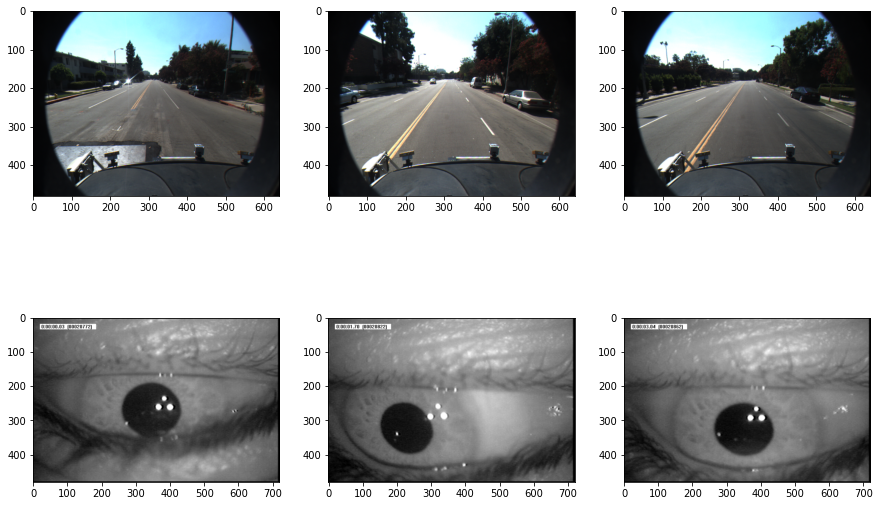

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np



lane1 = io.imread(path_to_project + 'images/lane_detection/f00000.png')
lane2 = io.imread(path_to_project + 'images/lane_detection/f00050.png')
lane3 = io.imread(path_to_project + 'images/lane_detection/f00090.png')

eye1 = io.imread(path_to_project + 'images/eye_tracking/0000.jpeg')
eye2 = io.imread(path_to_project + 'images/eye_tracking/0050.jpeg')
eye3 = io.imread(path_to_project + 'images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)



ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)

ax21.imshow(eye1)
ax22.imshow(eye2)
ax23.imshow(eye3)

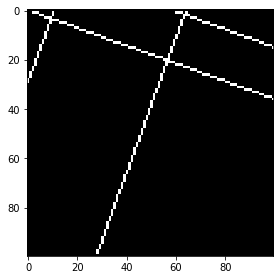

In [5]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
        
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 20, 60)
image = draw_line_hessian_normal(image, 20, 10)
image = draw_line_hessian_normal(image, 110, 0)
image = draw_line_hessian_normal(image, -70, 20)
io.imshow(image)

#### test simple case

In [9]:
from tqdm.notebook import tqdm
from typing import Union

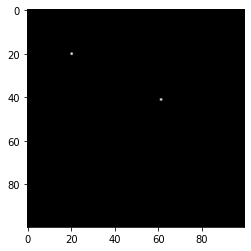

In [10]:
image = np.zeros((100,100))
image[20,20] = 1
image[41,61] = 1
plt.imshow(image, cmap = 'gray')

In [11]:
# using accumulator
def find_r(a: int, x: int, y: int, increment_value: int) -> int:

    return int(x * math.cos(math.radians(a)) + y * math.sin(math.radians(a))) + increment_value


def find_line_hesse(image: np.ndarray, increment_value: int, accum_arr: Union[None, np.ndarray] = None):

    """
    image: binary image with detected edges.

    r = x*cosa + y*sina

    r can have negative values, but we still want to note it in accumulator array thus using incrementor.
    Is there a better way?
    """

    alpha_values = list(range(1, 181, 1))

    if accum_arr is None:
        accum_arr = np.zeros((image.shape[0] + increment_value * 2, 181))

    total = len(np.where(image != 0))
    # iterate over all edge_points
    for idx, edge_point in tqdm(enumerate(zip(*np.where(image != 0))), total=total):

        x = edge_point[1]
        y = edge_point[0]

        r_list = [find_r(a, x, y, increment_value) for a in alpha_values]

        try:
            accum_arr[r_list, alpha_values] += 1
        except IndexError:
            # for the case if we want to limit space of solutions
            continue

    return accum_arr, increment_value


def draw_line(image: np.ndarray, accum_arr: np.ndarray, increment_value: int):

    image_to_draw = np.copy(image)
    for r, a in zip(*np.where(accum_arr == np.max(accum_arr))):
        image_to_draw = draw_line_hessian_normal(image_to_draw, a, r - increment_value)

    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(image)
    ax[1].imshow(image_to_draw)
    plt.show()


  0%|          | 0/2 [00:00<?, ?it/s]

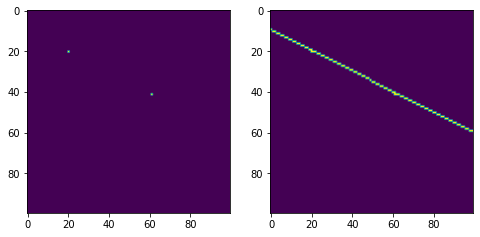

In [12]:
accum_arr, increment_value = find_line_hesse(image, 100)
draw_line(image, accum_arr, increment_value)

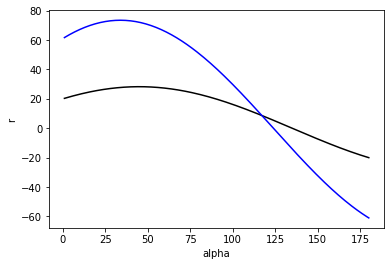

In [13]:
# plotting parameters of Hesse normal form

r_dict = {}
a_dict = {}

for idx, edge_point in enumerate(zip(*np.where(image !=0 ))):
    
    r_dict[idx] = []
    a_dict[idx] = []
    
    x = edge_point[1]
    y = edge_point[0]

    for a in range(1,181,1):
        r = round(x * math.cos(math.radians(a)) + y * math.sin(math.radians(a)), 3)
        
        r_dict[idx].append(r) 
        a_dict[idx].append(a)
        
        
        
plt.plot(a_dict[0], r_dict[0], color = 'black')
plt.plot(a_dict[1], r_dict[1], color = 'blue')
plt.xlabel("alpha")
plt.ylabel("r")
plt.show()

#### Test on simple circle

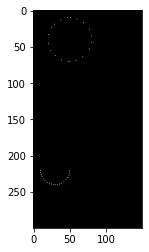

In [14]:
from skimage import draw
arr = np.zeros((300, 150))
rr, cc = draw.circle_perimeter(40, 50, radius=30, shape=arr.shape)
for idx in range(len(rr)):
    if idx % 9 == 0:
        arr[rr[idx], cc[idx]] = 1

rr, cc = draw.circle_perimeter(220, 30, radius=20, shape=arr.shape)
for idx in range(len(rr)):
    if idx % 6 == 0:
        arr[rr[idx], cc[idx]] = 1

plt.imshow(arr, cmap = 'gray')
plt.show()

In [15]:
def find_circles(image: np.ndarray, r_min: int, r_max: int, accum_arr: Union[None, np.ndarray] = None):
    
    r_span = r_max - r_min
    
    # accumulator array
    if accum_arr is None:
        # add padding in order to find circles on near edges of image
        accum_arr = np.zeros((r_span+1, image.shape[0] * 2, image.shape[1] * 2))

    
    # iterate through all edge points
    for idx, edge_point in tqdm(enumerate(zip(*np.where(image !=0 ))), total = len(np.where(image !=0 )[0])):
        
        x = edge_point[1]
        y = edge_point[0]

        for r_sub in range(r_span):
            r = r_min + r_sub

            # (x - a)^2 + (y - b)^2 = r^2
            rr, cc = draw.circle_perimeter(x, y, radius=r, shape=(image.shape[0] * 2 , image.shape[1] * 2))

            try:
                accum_arr[r_sub,rr,cc] += 1 
            except IndexError:
                continue
            
    return r_min, accum_arr

def plot_circles(accum_arr: np.ndarray, r_incrementor: int, image: np.ndarray, top_strongest: int = 1, plot_circle: bool = True):
    
    circle_image = np.zeros_like(image)
    for value in tqdm(np.unique(accum_arr)[-top_strongest:]):

        for idx, params in enumerate(zip(*np.where(accum_arr == value))):

            if np.unique(accum_arr)[-1] == 0:
                break

            r, x_c, y_c = params
            x_c, y_c = int(np.mean(x_c)), int(np.mean(y_c))
            r = r + r_incrementor
            #print(x_c, y_c)
            rr, cc = draw.circle_perimeter(y_c, x_c, radius=int(r), shape=circle_image.shape)
            circle_image[rr,cc] = 1  
    
    if plot_circle:
        fig, ax = plt.subplots(1,2, figsize = (8,8))
        ax[0].imshow(image, cmap = 'gray')
        ax[1].imshow(circle_image, cmap = 'gray')
        plt.show()
    
    return circle_image

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

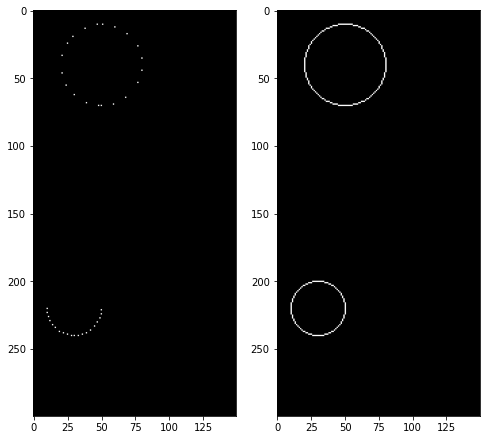

In [16]:

r_incrementor, accum_arr = find_circles(arr, 15, 40)
circle_image = plot_circles(accum_arr = accum_arr,  r_incrementor = r_incrementor, image = arr)



## OPTION 1: line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image
* display your result set (draw those lines on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

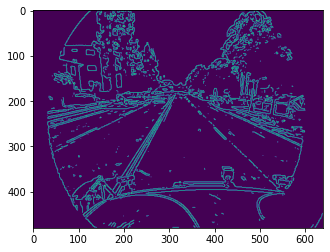

In [ ]:
lines_image = io.imread('images/lane_detection/f00025.png')

image = feature.canny(color.rgb2gray(lines_image), sigma = 1, low_threshold=0.1, high_threshold=0.)

plt.imshow(image)

In [ ]:
increment_value = 1000

accum_arr, increment_value = find_line_hesse(image, increment_value, accum_arr = np.zeros((4000,181)) )


  0%|          | 0/2 [00:00<?, ?it/s]

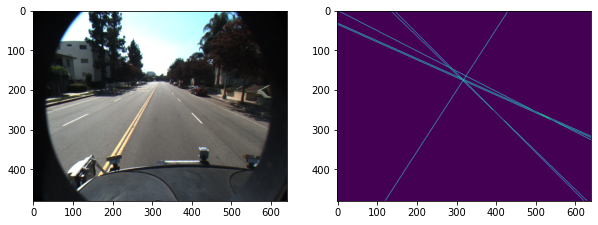

In [ ]:
#image_to_draw = np.copy(image).astype(int)
image_to_draw = np.zeros_like(image.astype(int))
for value in np.unique(accum_arr)[-5:]:
    for idx, r_a in enumerate(zip(*np.where(accum_arr == value))):
        r, a = r_a
        # if (a > 35) and (a < 130):
        #     continue
        image_to_draw = draw_line_hessian_normal(image_to_draw, a, r - increment_value)

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(lines_image)
ax[1].imshow(image_to_draw)
plt.show()

## OPTION 2: circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

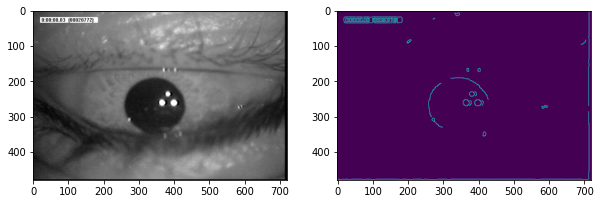

In [ ]:
eye_image = io.imread('images/eye_tracking/0000.jpeg')

image = feature.canny(color.rgb2gray(eye_image), sigma = 1, low_threshold=0.2, high_threshold=0.4)

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(eye_image)
ax[1].imshow(image)
plt.show()

In [ ]:

r_incrementor, accum_arr = find_circles(image, 50, 100)



  0%|          | 0/3015 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

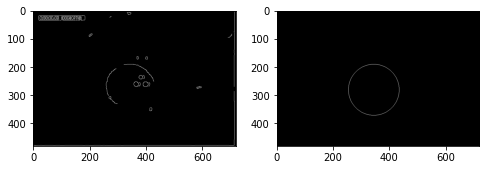

In [ ]:
circles = plot_circles(accum_arr = accum_arr,  r_incrementor = r_incrementor, image = image, top_strongest = 1)


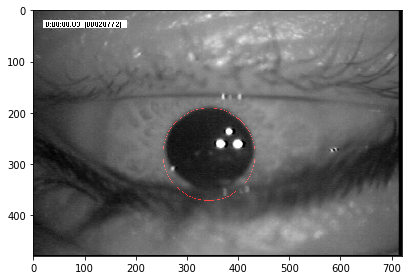

In [ ]:
r, y, x = np.where(accum_arr == np.max(accum_arr))
r, y, x = r[0], y[0], x[0]
r = r + r_incrementor

test_image = np.copy(eye_image)
rr, cc = draw.circle_perimeter(x, y, radius=r, shape=test_image.shape)
test_image[rr, cc,0] = 255
io.imshow(test_image)


In [ ]:
import os
import cv2


image_names = [i for i in os.listdir("images/eye_tracking") if not i.startswith(".")]

processed_images = []

for img_name in tqdm(image_names):
    path_to_image = os.path.join("images", "eye_tracking", img_name)
    
    eye_image = io.imread(path_to_image)

    image = feature.canny(color.rgb2gray(eye_image), sigma = 1, low_threshold=0.2, high_threshold=0.4)
    
    r_incrementor, accum_arr = find_circles(image, 50, 100)
    #circles = plot_circles(accum_arr = accum_arr,  r_incrementor = r_incrementor, image = image, top_strongest = 1, plot_circle=False)
    
    r, y, x = np.where(accum_arr == np.max(accum_arr))
    r, y, x = r[0], y[0], x[0]
    r = r + r_incrementor

    rr, cc = draw.circle_perimeter(x, y, radius=r, shape=eye_image.shape)
    
    eye_image[rr,cc,0] = 255
    processed_images.append(eye_image)


In [ ]:
import pickle

with open("eyeball_tracking.pickle", "wb") as f:
    pickle.dump(processed_images, f)

In [ ]:
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')#'M','J','P','G')

video = cv2.VideoWriter("eyeball_tracking7.avi", fourcc, 14, (720, 480), isColor=True)

for i in processed_images:
    video.write(i)

### video: https://github.com/IvanMatoshchuk/cv2122_assignments_material/blob/main/a2/eyeball_tracking.avi

In [ ]:
from IPython.display import Video, HTML

Video("eyeball_tracking.avi")

# Ex. 3.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

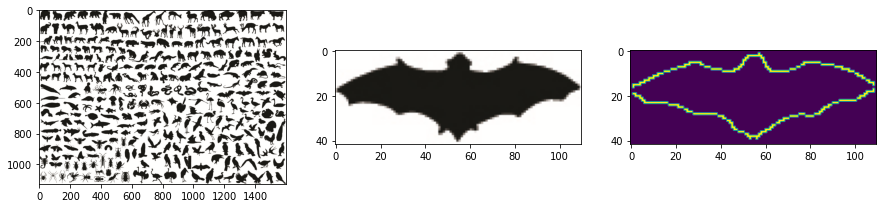

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

animals = io.imread(path_to_project + 'images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

In [18]:
# def conv2d(img, kernel, same = True):
    
#     if same:
#         img = np.pad(img, 1)

#     # assuming kernel is nxn
#     kernel_size = kernel.shape[0]

#     output = np.zeros((img.shape[0] - kernel_size + 1, img.shape[1] - kernel_size + 1))

#     steps_x = img.shape[1] - kernel_size + 1
#     steps_y = img.shape[0] - kernel_size + 1

#     for y in tqdm(range(0,steps_y,1)):
#         for x in range(0, steps_x, 1):
#             output[y,x] = np.sum(img[y:y+kernel_size, x:x+kernel_size] * kernel)
    
#     return output


# Shifted implementation of convolution ( From tutorial last week, Gabriel's solution )
def conv2d(image, kernel, pad=0.5):
    """
    If kernel has an even number the "hangover pixel"
    will be to the top/left.
    """
    result = np.zeros(image.shape)
    
    # Convert kernel into kernel with even sides
    kernel = np.array(kernel)
    if kernel.shape[0] % 2 == 0:
        new_kernel = np.zeros((kernel.shape[0] + 1, kernel.shape[1]))
        new_kernel[:kernel.shape[0]] = kernel
        kernel = new_kernel
    if kernel.shape[1] % 2 == 0:
        new_kernel = np.zeros((kernel.shape[0], kernel.shape[1] + 1))
        new_kernel[:,:kernel.shape[1]] = kernel
        kernel = new_kernel
    
    # pad the image
    pad_y, pad_x = kernel.shape[0] // 2, kernel.shape[1] // 2
        
    padded = np.empty((image.shape[0] + pad_y * 2, image.shape[1] + pad_x * 2))
    if not pad_y and not pad_x:
        raise Exception("Bad Kernel")
    elif not pad_y:
        padded[:, pad_x:-pad_x] = image
        padded[:,:pad_x], padded[:,-pad_x:] = pad, pad
    elif not pad_x:
        padded[pad_y:-pad_y,:] = image
        padded[:pad_y], padded[-pad_y:] = pad, pad
    else:
        padded[pad_y:-pad_y, pad_x:-pad_x] = image
        padded[:pad_y], padded[-pad_y:] = pad, pad
        padded[:,:pad_x], padded[:,-pad_x:] = pad, pad

    # Shift image for every kernel value
    for kernel_y in range(kernel.shape[0]):
        for kernel_x in range(kernel.shape[1]):
            displacement_y = kernel_y + image.shape[0]
            displacement_x = kernel_x + image.shape[1]

            shifted_image = np.empty_like(image)
            shifted_image = padded[kernel_y:displacement_y, kernel_x:displacement_x]
            
            result += shifted_image * kernel[kernel_y, kernel_x]

    kernel_sum = np.sum(kernel)
    return result / kernel_sum if kernel_sum else result

def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D



In [19]:
def find_edge_center(binarized_image, plot_center = False, center_increase_size = 1):

    y_c = math.ceil(np.mean(np.where(binarized_image)[0]))
    x_c = math.ceil(np.mean(np.where(binarized_image)[1]))

    if plot_center:
        binarized_image = binarized_image.astype(int)

        binarized_image[binarized_image == 1] = 255
        stacked_binarized_image = np.dstack([binarized_image, binarized_image, binarized_image])
        stacked_binarized_image[y_c-center_increase_size:y_c+center_increase_size, x_c-center_increase_size:x_c+center_increase_size,:] = [255,0,0]


        plt.imshow(stacked_binarized_image)

    return y_c, x_c

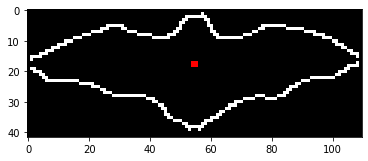

In [ ]:
center = find_edge_center(bat_edge, plot_center = True)

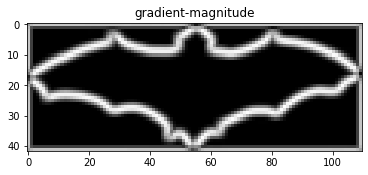

In [20]:
def get_thetas_and_gradients(img):
    
    if len(img.shape) > 2:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img

    # apply Gaussian smoothing
    kernel_gaus = gaussian_kernel(3,2)
    img_smoothed = conv2d(img_gray, kernel_gaus)

    # apply sobel kernel to find gradients
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    gradient_along_x = conv2d(img_smoothed, sobel_kernel)
    gradient_along_y = conv2d(img_smoothed,sobel_kernel.T)
    gradient_magnitude = np.sqrt(np.square(gradient_along_x) + np.square(gradient_along_y))

    # find edge direction
    theta = np.arctan2(gradient_along_y, gradient_along_x)

    return gradient_magnitude, theta

gradient_magnitude, theta = get_thetas_and_gradients(bat)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("gradient-magnitude")
plt.show()

In [ ]:


def create_mapping_dict(image_edge, image_thetas, center):
    
    mapping_dict = {}

    for i in tqdm(zip(*np.where(image_edge !=0 ))):
        orientation = math.ceil(np.degrees(image_thetas[i]))
        distance_to_center = (math.ceil(center[0]) - i[0], math.ceil(center[1]) - i[1]) 

        if orientation not in mapping_dict.keys():
            mapping_dict[orientation] = []
            
        mapping_dict[orientation].append(distance_to_center)
    
    return mapping_dict

In [ ]:
mapping_dict = create_mapping_dict(bat_edge, theta, center)


0it [00:00, ?it/s]

In [ ]:
animals_edge = feature.canny(color.rgb2gray(animals), 2)
gradient_magnitude, thetas = get_thetas_and_gradients(animals)


In [ ]:
# indices of non-zero entries
indices = np.where(animals_edge)


# init accum array
accum_arr = np.empty_like(color.rgb2gray(animals))


# use lookup-table to find r-values
for idx, theta in tqdm(enumerate(thetas[indices])):
    accum_arr[indices[0][idx], indices[1][idx]] = 1

    degrees_value = math.ceil(np.degrees(theta))

    r_locations = mapping_dict.get(degrees_value, None)
    if r_locations is None:
        continue
    else:
        for r_indices in r_locations:
            try:
                y_c = indices[0][idx] + r_indices[0]
                x_c = indices[1][idx] + r_indices[1]

                accum_arr[y_c, x_c] += 1
            except IndexError:
                pass

0it [00:00, ?it/s]

In [ ]:
center_index = np.where(accum_arr == np.unique(accum_arr)[-1])
y_c = center_index[0]
x_c = center_index[1]

print("Center point of the object: ", y_c, x_c)

Center point of the object:  [537] [1326]


### Draw the found object

In [ ]:
def nearest_nonzero_idx(a,x,y):
    tmp = a[x,y]
    a[x,y] = 0

    # indices of non-zero elements
    r,c = np.nonzero(a)
    a[x,y] = tmp

    # distance to non-zero entries
    min_idx = ((r - x)**2 + (c - y)**2).argmin()
    return r[min_idx], c[min_idx]

In [ ]:
animals_edge_copy = np.copy(animals_edge.astype(int))
np.unique(animals_edge_copy)

array([0, 1])

In [ ]:
indices_object = []

dist_thresh_y = 5
dist_thresh_x = 5
on_edges = False

j = 0
while True:
    animals_edge_copy[y_c, x_c] = 0

    prev_y_c, prev_x_c = y_c, x_c

    y_c, x_c = nearest_nonzero_idx(animals_edge_copy, y_c, x_c)
    
    if np.abs(prev_y_c - y_c) > dist_thresh_y or np.abs(prev_x_c - x_c) > dist_thresh_x:
        if on_edges:
            break
        else:
            dist_thresh_y = 2
            dist_thresh_x = 2
            on_edges = True
    indices_object.append((y_c, x_c ))


In [ ]:
len(indices_object)

271

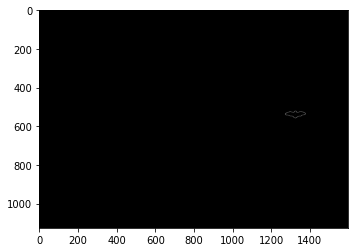

In [ ]:
animals_edge_copy = np.zeros_like(animals_edge_copy)
animals_edge_copy[list(zip(*indices_object))[0], list(zip(*indices_object))[1]] = 255
animals_edge_copy[center_index] = 255

plt.imshow(animals_edge_copy, cmap = 'gray')

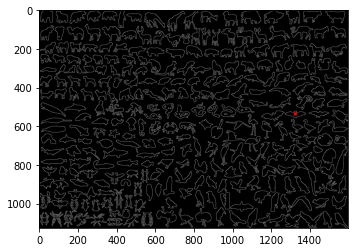

In [ ]:
def draw_result(edge_image, dot_coords,increase_size = 1):

    image = edge_image.astype(int)

    y_c = int(dot_coords[0])
    x_c = int(dot_coords[1])

    image[image == 1] = 255
    image_stacked = np.dstack([image, image, image])
    image_stacked[y_c-increase_size:y_c+increase_size, x_c-increase_size:x_c+increase_size,:] = [255,0,0]

    plt.imshow(image_stacked)

draw_result(animals_edge, center_index, increase_size = 8)

## BONUS 
* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**BONUS**)

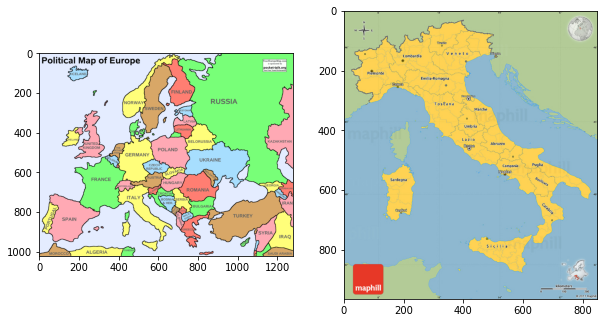

In [ ]:
europe = io.imread(path_to_project + 'images/europe_map_political.gif')
italy = io.imread(path_to_project + 'images/italy.jpg')


fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(europe)
ax[1].imshow(italy)

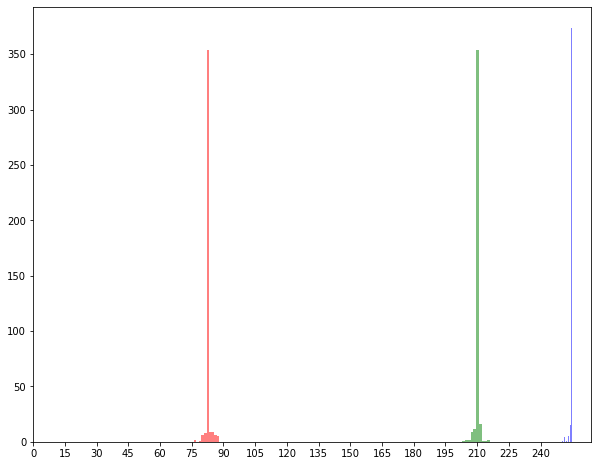

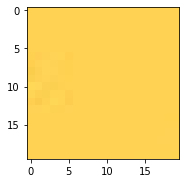

In [ ]:
# plot color distribution
plt.figure(figsize = (10,8))
colors = ["b","g","r"]

for idx,i in enumerate(colors):
    plt.hist(italy[210:230, 210:230, idx].flatten(), color = i, alpha = 0.5)
    plt.xticks(range(0,255,15))

plt.show()
plt.subplot(1, 2, 1).imshow(italy[210:230, 210:230])

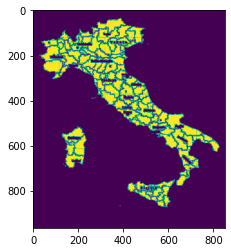

In [ ]:
italy_gray = color.rgb2gray(italy)

test_italy = np.zeros_like(italy_gray)

test_italy[np.where((italy[...,0] > 230) & (italy[...,1] < 220) & (italy[...,1] > 190) & (italy[...,2] > 70) & (italy[...,2] < 95))] = 1

plt.imshow(test_italy)

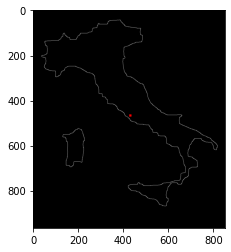

In [ ]:
from skimage import morphology

italy_binarized = morphology.erosion((morphology.dilation(test_italy, np.ones((17,17)))), np.ones((26,26)))
italy_edge = feature.canny(italy_binarized, 2)
center = find_edge_center(italy_edge, plot_center=True, center_increase_size = 5)

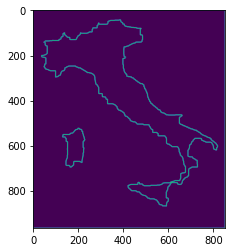

In [ ]:
italy_gradient_magnitude, italy_thetas = get_thetas_and_gradients(italy_binarized)
plt.imshow(italy_gradient_magnitude)

In [ ]:
# create mapping dict

mapping_dict = create_mapping_dict(italy_edge, italy_thetas, center)


0it [00:00, ?it/s]

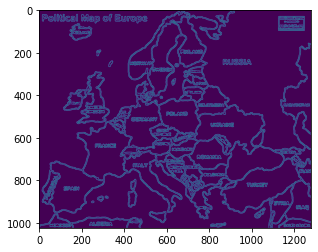

In [ ]:
europe_edge = feature.canny(color.rgb2gray(europe), 2)

europe_gradient_magnitude, europe_thetas = get_thetas_and_gradients(europe)

plt.imshow(europe_edge)


In [ ]:
scales_num = 7
thetas_num = 10

scales = np.linspace(0.3,0.7,scales_num)
print("scales", scales, "\n")

theta_deltas = np.linspace(-30, 30, thetas_num)
print("Theta deltas: ", theta_deltas)

scales [0.3        0.36666667 0.43333333 0.5        0.56666667 0.63333333
 0.7       ] 

Theta deltas:  [-30.         -23.33333333 -16.66666667 -10.          -3.33333333
   3.33333333  10.          16.66666667  23.33333333  30.        ]


In [ ]:
# indices of non-zero entries
indices = np.where(europe_edge)


# init accum array
accum_arr = np.zeros((europe_edge.shape[0], europe_edge.shape[1], scales_num, thetas_num))

# use lookup-table to find r-values
for idx, theta in tqdm(enumerate(europe_thetas[indices]), total = len(indices[0])):
    #accum_arr[indices[0][idx], indices[1][idx],:,:] = 1

    for scale_idx, scale in enumerate(scales):
        for theta_delta_idx, theta_delta in enumerate(theta_deltas):


            degrees_value = math.ceil(np.degrees(theta)  + theta_delta)
            if (degrees_value > 180) or (degrees_value < -180):
                degrees_value = math.ceil(np.degrees(theta)  - theta_delta)



            r_locations = mapping_dict.get(degrees_value, None)

            if r_locations is None:
                continue
            else:
                for r_indices in r_locations:
                    try:
                        y_c = indices[0][idx] + math.ceil(r_indices[0] * scale)
                        x_c = indices[1][idx] + math.ceil(r_indices[1] * scale)

                        accum_arr[y_c, x_c, scale_idx, theta_delta_idx] += 1
                    except IndexError:
                        pass

  0%|          | 0/64028 [00:00<?, ?it/s]

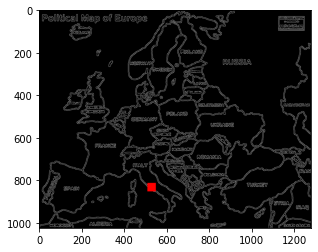

In [ ]:
draw_result(europe_edge, np.where(accum_arr == np.unique(accum_arr)[-1] ) , 20 )

## Exercise 4a: CAMSHIFT

## Read Paper
You can find the paper in the Whiteboard under 'Resources'.

## Calculate histogram
* Implement a function that creates a color histogram. Pass either an image and ROI, or the image underlying the ROI. 
* For this purpose, a second (or third) parameter can be passed to specify the number of bins. 
* Load the image "images/racecar.png" and convert the image to the HSV color space. Plot the Hue channel. (**RESULT**)

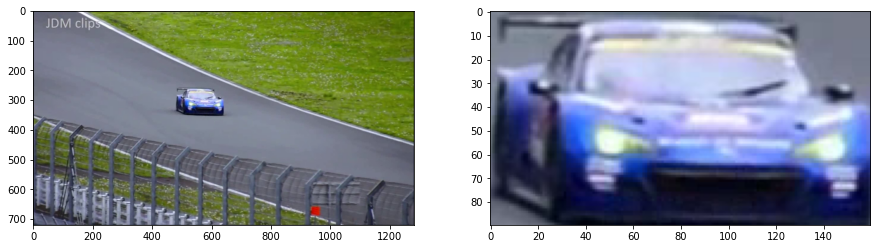

In [14]:
# dieser Code wurde als Musterlösung von Tobias Schülke zur Verfügung gestellt und von Tim renoviert

%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')
from google.colab import drive
from matplotlib import colors

IMAGES_PER_ROW = 4

MIN_SATURATION_CAR = 0.2
MIN_VALUE_CAR = 0.5
MIN_SATURATION_TACO = 0.8
MIN_VALUE_TACO = 0.2

ROI_FRAME_MARGIN_CAR = 60
ROI_FRAME_MARGIN_TACO = 20


image = io.imread(path_to_project + '/images/racecar.png')
imageCar = image[260:350, 480:640]

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
# ...

ax1.imshow(image)
ax2.imshow(imageCar)
 
def createColorHistogram(img, binCount = 256, out = plt):
    img=(img.astype(float))/255.0
    
    img_hsv = colors.rgb_to_hsv(img[...,:3])
    img_hsv=img_hsv[...,0].flatten()
    
    return out.hist(img_hsv*360,binCount,range=(0.,360.), label='Hue')
    

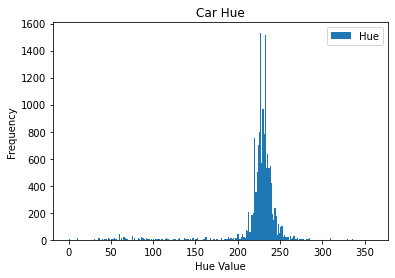

In [16]:
createColorHistogram(imageCar)

plt.title("Car Hue")
plt.xlabel("Hue Value")
plt.ylabel("Frequency")
plt.legend()
#plt.savefig('car_histogram.jpg',bbox_inches='tight')
plt.show()

* display the histogram for the Hue channel for the entire image and for the RIO (x,y) = (480, 260) to (640, 350). Vary the number of bins for testing purposes (**RESULT**).

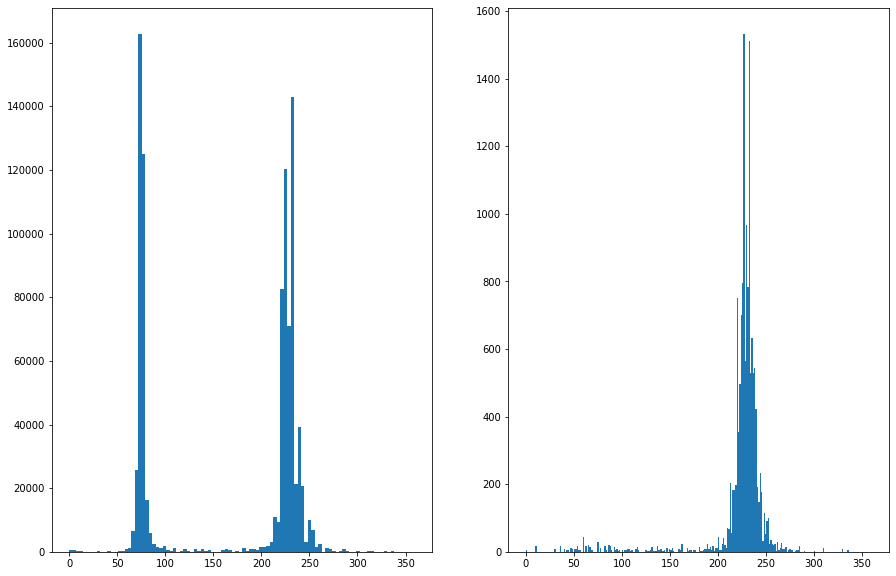

In [15]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
histCar100 = create_color_histogram(image, 100, ax1)
histCar10 = create_color_histogram(imageCar, 256, ax2)


## probability distribution
* implement the method outlined in the CAMSHIFT paper to create a probability distribution for a given object's hue histogram
* create the histogram of the car from the image "racecar.png" and apply the new function to the last frame of the video (images/racecar/151.jpg) (**RESULT**)


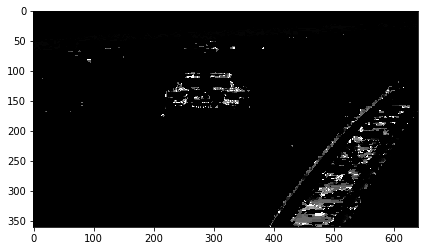

In [18]:
# Tip: in der Nacht sind alle Katzen grau ;)
def createProbDistribution(image, objectHist, nbins, minSaturation, minValue):
    def min_max_scaling(histogram_values):
        mn, mx = histogram_values.min(), histogram_values.max()
        return (histogram_values - mn) / (mx - mn)
    (h_values,bin_edges,n) = objectHist
    
    h_values=min_max_scaling(h_values)

    image=(image.astype(float))/255.0
    image_hsv = colors.rgb_to_hsv(image[...,:3])
    
    prob_distr=np.zeros((image_hsv.shape[0], image_hsv.shape[1]))
    for i in range(image_hsv.shape[0]):
        for j in range(image_hsv.shape[1]):
            bin_index = np.digitize(image_hsv[i][j][0]*360,bin_edges, right=True)
            if(image_hsv[i][j][1] < minSaturation or image_hsv[i][j][2] < minValue):
                prob_distr[i][j] = 0.0
            else:
                try:
                    prob_distr[i][j] = h_values[bin_index-1]
                except:
                    prob_distr[i][j] = 0.0
    return prob_distr
            
lastFrame = io.imread(path_to_project +  '/images/racecar/151.jpeg')
histogramCar = createColorHistogram(imageCar, 256, ax1)
probDistr = createProbDistribution(lastFrame, histogramCar, 256, MIN_SATURATION_CAR, MIN_VALUE_CAR)
io.imshow(probDistr)

### show ROI in image


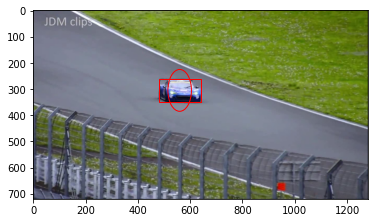

In [19]:
def drawROI(image, x, y, width, height, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    
    out.imshow(image)

def drawEllipse(image, x, y, width, height, angle, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Ellipse(
            (x + width / 2, y + height / 2),
            width,
            height,
            angle,
            fill=False,
            edgecolor="red"
        )
    )
    
    out.imshow(image)

drawROI(image, 480, 260, 160, 90)
drawEllipse(image,480,260,160,90,90)

## Exercise 4.1 - Mean Shift
* Implement the Mean Shift method for a ROI as described in the lecture. Test the algorithm on the image sequences "images/racecar/*.jpg" or "images/taco/*.jpg". Select the appropriate tracking window (to reduce the file size I have reduced the images by a factor of 2, i.e. the ROI from above must be adjusted accordingly). 
* Draw the trajectory of the objects as returned by Mean Shift. (**RESULT**)

1 / 10


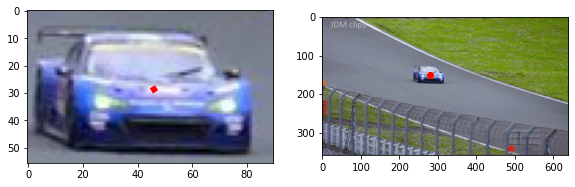

2 / 10


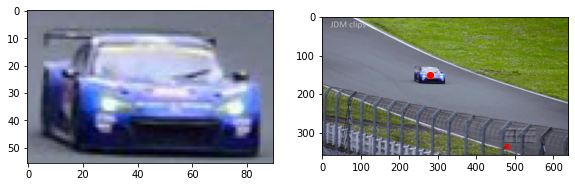

3 / 10


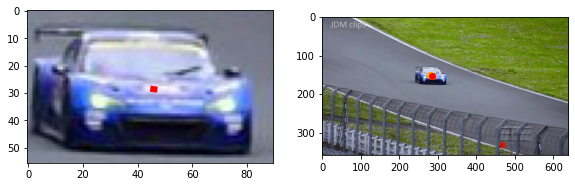

4 / 10


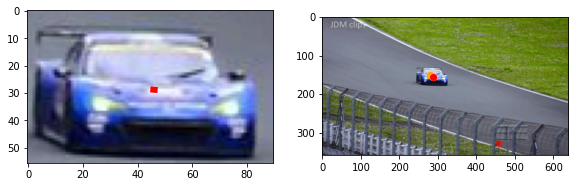

5 / 10


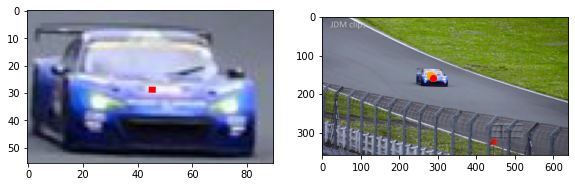

6 / 10


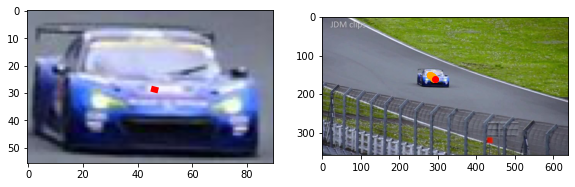

7 / 10


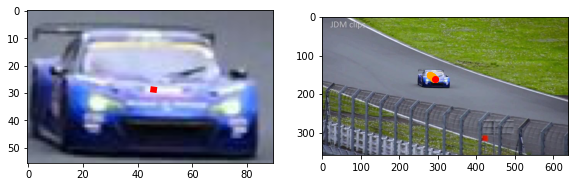

8 / 10


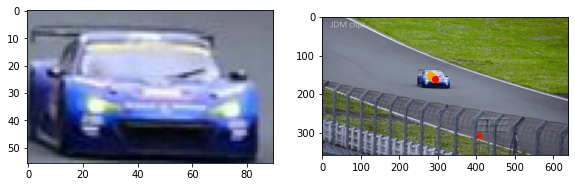

9 / 10


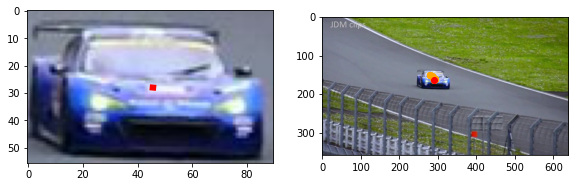

10 / 10


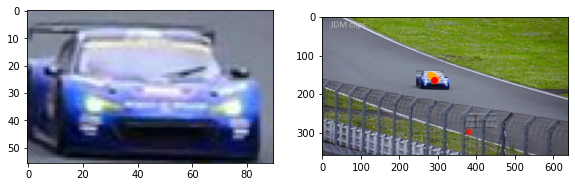

In [24]:
from skimage import io
import numpy as np
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import cv2
import math
from google.colab import drive



MIN_SATURATION = 0.2
MIN_VALUE = 0.5
MIN_PROB = -1
nbins = 256



def get_area_from_roi(img, roi):
    return img[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]



img_folder = path_to_project + '/images/racecar'
images = []


def pad(n):
  if (n < 10): return f'00{n}'
  if (n < 100): return f'0{n}'
  return n

images = [io.imread(img_folder +f'/{pad(i)}.jpeg') for i in range(10)]

def run():
  roi = (230,122,90,56) 
  total_centroids_history = list()
  img = io.imread(path_to_project + '/images/racecar.png')

  frame_roi = get_area_from_roi(img, (480, 260, 160, 90))
  histo_lookup = createColorHistogram(frame_roi, nbins) 
  plt.close()

  for i, img in enumerate(images):
      print(f'{i+1} / {len(images)}')
    

      fig = plt.figure(figsize=(15, 10))
      ax1 = plt.subplot(1, 3, 1)
      ax2 = plt.subplot(1, 3, 2)
      
      prob_distr = createProbDistribution(img, histo_lookup, 256, MIN_SATURATION, MIN_VALUE)
      
      roi, centroids_history = _camshift(prob_distr, roi, True)
      
      total_centroids_history.extend(centroids_history)
      x2, y2 = zip(*total_centroids_history)
      centroids_hystory1 = list(map(lambda x: (x[0]-roi[0], x[1]-roi[1]), centroids_history))
      x, y = zip(*centroids_hystory1)
      
      ax1.plot(x,y, color='red', lw='6')
      ax2.scatter(x2,y2, color='orange') # this is a trajectory
      ax2.scatter(x2[-1],y2[-1], color='red')
      ax1.imshow(get_area_from_roi(img, roi))
      ax2.imshow(img)
      plt.show()
  
run()

##  Exercise 4.2 - CAMSHIFT
* extend your algorithm by adjusting the size of the ROI and finding the object's orientation
* execute the algorithm again on one of the image sequences and draw an ellipse on the image, which represents the found parameters (**RESULT**)

In [23]:
def get_area_from_roi(img, roi):
    return img[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]

def _camshift(prob_distr, roi, only_mean=False):
    def compute_new_roi(roi, new_centroid):
        img_new_centroid = (new_centroid[0]+roi[0], new_centroid[1]+roi[1])
        x = abs( img_new_centroid[0] - (roi[2]/2) )
        y = abs ( img_new_centroid[1] - (roi[3]/2) )
        return int(x),int(y),roi[2],roi[3],0

    def compute_moments(img, i, j):
        moment = 0
        for x, row in enumerate(img):
            for y, pixel in enumerate(row):
                moment = moment + ( x**i*y**j * pixel )
        return moment

    def get_theta(dist, xc, yc, m00):
        m11 = compute_moments(dist,1,1)
        m02 = compute_moments(dist,0,2)
        m20 = compute_moments(dist,2,0)
        return np.arctan((2 * (m11/m00 - xc*yc)) / ((m20/m00 - xc*xc) - (m02/m00 - yc*yc))) / 2
    
    iter_count = 0
    centroids_history = list()

    while True:
        roi_prob_distr = get_area_from_roi(prob_distr,roi)
        
        m00 = compute_moments(roi_prob_distr,0,0)
        m10 = compute_moments(roi_prob_distr,1,0)
        m01 = compute_moments(roi_prob_distr,0,1)
        
        if(m00==0):
            break;
        
        xc = m10/m00
        yc = m01/m00
        new_roi = compute_new_roi(roi, (yc,xc))
        
        centroids_history.append( ( yc+roi[0], xc+roi[1]) )
        
        if( (abs(new_roi[0]-roi[0])<2 and 
             abs(new_roi[1]-roi[1])<2) or iter_count > 20):
            if not only_mean:
              s = 2*math.sqrt(m00)
              theta = get_theta(roi_prob_distr, xc, yc, m00)
              roi = (new_roi[0],new_roi[1],int(s * 1.5),int(s), theta)

            break;
        
        roi = new_roi
        iter_count += 1
    return roi, centroids_history


0 / 10


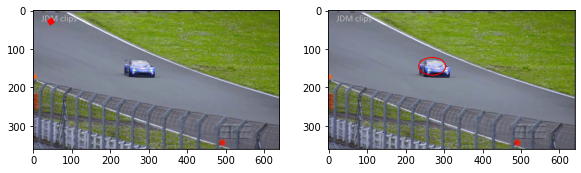

1 / 10


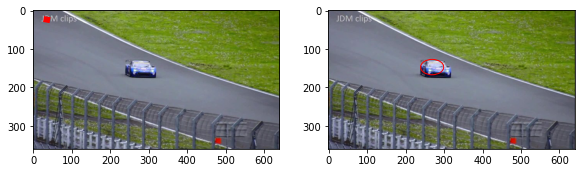

2 / 10


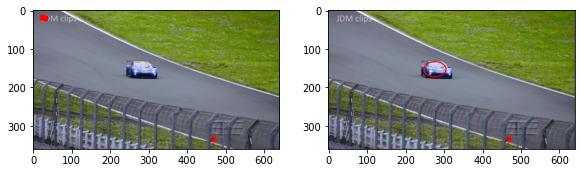

3 / 10


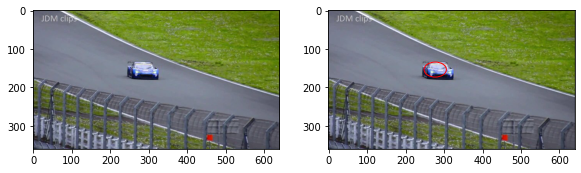

4 / 10


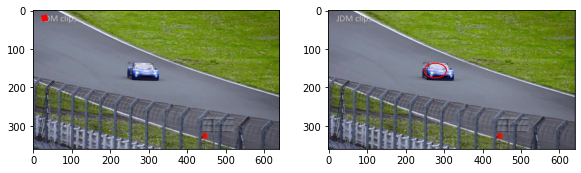

5 / 10


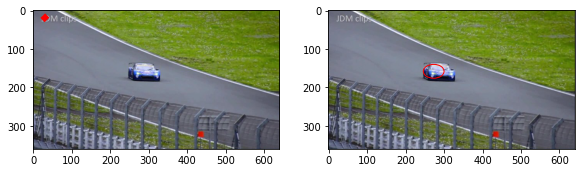

6 / 10


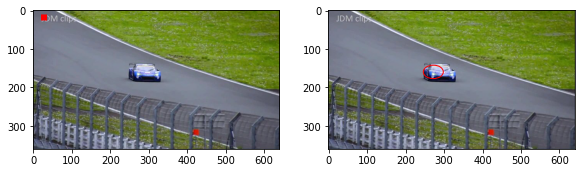

7 / 10


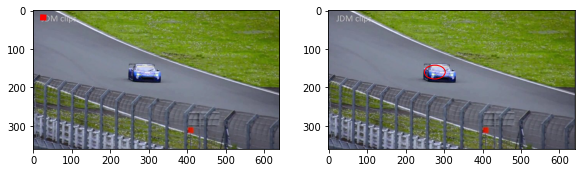

8 / 10


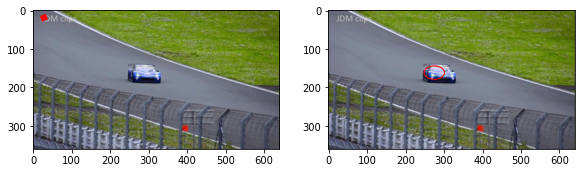

9 / 10


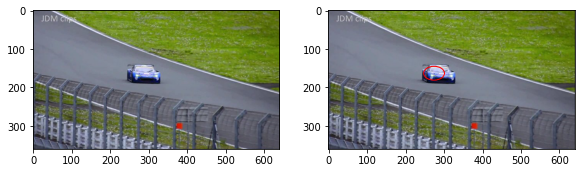

In [25]:
from skimage import io
import numpy as np
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import cv2
import math


MIN_SATURATION = 0.2
MIN_VALUE = 0.5
MIN_PROB = -1
nbins = 256





imgages = [io.imread(img_folder +f'/{pad(i)}.jpeg') for i in range(5)]
def run():
  roi = (230,122,90,56) 
  total_centroids_history = list()
  img = io.imread(path_to_project + '/images/racecar.png')

  frame_roi = get_area_from_roi(img, (480, 260, 160, 90))
  histo_lookup = createColorHistogram(frame_roi, nbins) 
  plt.close()

  for i, img in enumerate(images):
      print(f'{i} / {len(images)}')
    

      fig = plt.figure(figsize=(15, 10))
      ax1 = plt.subplot(1, 3, 1)
      ax2 = plt.subplot(1, 3, 2)
      
      prob_distr = createProbDistribution(img, histo_lookup, 256, MIN_SATURATION, MIN_VALUE)
      
      roi, centroids_history = _camshift(prob_distr, roi)
      
      total_centroids_history.extend(centroids_history)
      x2, y2 = zip(*total_centroids_history)
      centroids_hystory1 = list(map(lambda x: (x[0]-roi[0], x[1]-roi[1]), centroids_history))
      x, y = zip(*centroids_hystory1)
      
      ax1.plot(x,y, color='red', lw='6')
      drawEllipse(img, roi[0], roi[1], roi[2], roi[3], roi[4], ax1)
      ax2.imshow(img)
      plt.show()
  
run()

## Exercise 4b: Histogram of Oriented Gradients (HOG)

## Read paper
Have a look at the section "Resources" in the Whiteboard and read the original HOG work of Dalal and Triggs from 2005 and the good summary by Tomasi (I would read this first). Now you shouldn't have any problems with the implementation of the algorithm! 

## MIT-DB for people
Download the complete image data set here: http://pascal.inrialpes.fr/data/human/ 


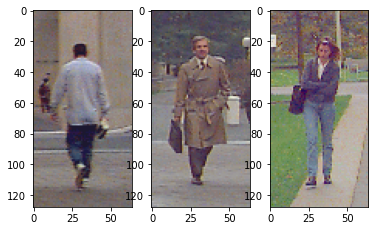

In [6]:
%matplotlib inline 
from skimage import io,color, transform
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
warnings.filterwarnings("ignore")

pers1 = io.imread(path_to_project + 'images/per00002.ppm')
pers2 = io.imread(path_to_project + 'images/per00007.ppm')
pers3 = io.imread(path_to_project + 'images/per00014.ppm')

fig = plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(pers1)
ax2.imshow(pers2)
ax3.imshow(pers3)


## Gradients and directions
First, implement the extraction of the gradient via convolution with the Sobel kernels. Translate the two result matrices into an image containing the gradient direction (one angle per pixel). Display this image for each of the three input images above. Like it fancy? Add transparency inversely proportional to the gradient magnitude (weak gradients are transparent). 

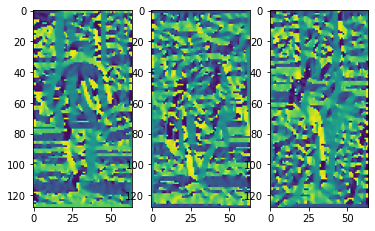

In [21]:
# dieser Code ist Teil eine Musterlösung, die von Adrian Defer zur Verfügung gestellt und von Tim renoviert wurde


# def getGradientConv(image):
#     # Sx = # 
#     Sy = Sx.T
#     Gx = ndimage.convolve(image, Sx)
#     Gy = ndimage.convolve(image, Sy)  
#     # ...
#     # return ...


# Function from Exercise 3 ( Hough Transform )

gradient_magnitude_pers1, theta_pers1 = get_thetas_and_gradients(pers1)
gradient_magnitude_pers2, theta_pers2 = get_thetas_and_gradients(pers2)
gradient_magnitude_pers3, theta_pers3 = get_thetas_and_gradients(pers3)



fig = plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(theta_pers1)
ax2.imshow(theta_pers2)
ax3.imshow(theta_pers3)

## Gradient orientation histograms (GOHs)
Now implement a function that generates GOHs on image cells. Pass a gradient direction image (as described above) to the function. The image cells should be 8 x 8 pixels in size. Please do not forget the voting with "bi-linear interpolation" (important!). Compute the GOH for the input image "star.png" with and without interpolation! Now rotate the image by -5° and compute both variants of the GOH again! What are the Euclidean differences of the histograms (original vs rotated) with and without interpolation?


In [158]:

def get_histogram(sub_cells_thetas, sub_cells_magnitutes, bin_width = 20, bins = np.linspace(0,180,10), centers = np.linspace(10,170,9), interpolate = True):
    
    sub_cells_histogram = np.zeros((9))

    for idx, pixel_theta in enumerate(sub_cells_thetas):
        bin = math.floor(np.abs(pixel_theta / bin_width - 1/ 2))
        if bin == 8:
            sub_cells_histogram[bin] += sub_cells_magnitutes[idx]
            continue

        # bi-linear interpolation
        if interpolate:
            vote_bin = sub_cells_magnitutes[idx] * ((centers[bin + 1]) - pixel_theta)/bin_width
            vote_bin_pp = sub_cells_magnitutes[idx] * (pixel_theta - centers[bin])/bin_width
        else:
            vote_bin = sub_cells_magnitutes[idx]
            vote_bin_pp = 0

        sub_cells_histogram[bin] += vote_bin
        sub_cells_histogram[bin + 1] += vote_bin_pp

    return sub_cells_histogram

In [159]:

def compute_cell_histograms(thetas, magnitutes, interpolate = True):

    sub_cell_size = 8
    steps_y = thetas.shape[0] // sub_cell_size
    steps_x = thetas.shape[1] // sub_cell_size

    output_array = np.zeros((steps_y,steps_x, 9))


    for x in range(0, steps_x, 1):
        for y in range(0, steps_y, 1):
            sub_cells_thetas = thetas[y*sub_cell_size : (y+1)*sub_cell_size, x*sub_cell_size : (x+1)*sub_cell_size]        
            sub_cells_magnitutes = magnitutes[y*sub_cell_size : (y+1)*sub_cell_size, x*sub_cell_size : (x+1)*sub_cell_size]
            
            sub_cells_histogram = get_histogram(sub_cells_thetas = np.degrees(np.abs(sub_cells_thetas)).flatten(), sub_cells_magnitutes = sub_cells_magnitutes.flatten(), interpolate = interpolate)

            output_array[y,x,:] = sub_cells_histogram
    
    return output_array

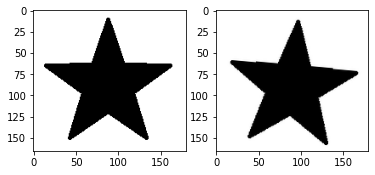

In [160]:
star = io.imread(path_to_project + 'images/star.png')
star_rotated = ndimage.rotate(star, -5, mode='nearest')
star_rotated = star_rotated[5:star.shape[0]+5, 5:star.shape[1]+5,:]

fig, ax = plt.subplots(1,2)

ax[0].imshow(star)
ax[1].imshow(star_rotated)

In [161]:
gradient_magnitude_star, thetas_star = get_thetas_and_gradients(star)

with_interpolation = compute_cell_histograms(thetas_star, gradient_magnitude_star, interpolate = True)
without_interpolation = compute_cell_histograms(thetas_star, gradient_magnitude_star, interpolate = False)

####################### Rotated

gradient_magnitude_star, thetas_star = get_thetas_and_gradients(star_rotated)

with_interpolation_rotated = compute_cell_histograms(thetas_star, gradient_magnitude_star, interpolate = True)
without_interpolation_rotated = compute_cell_histograms(thetas_star, gradient_magnitude_star, interpolate = False)


assert with_interpolation.shape == without_interpolation.shape == with_interpolation_rotated.shape == without_interpolation_rotated.shape

In [162]:
distances_interpolation = []
distances_without_interpolation = []

for i in range(with_interpolation.shape[0]):
    for j in range(with_interpolation.shape[1]):
        distance_without_interpolation = np.linalg.norm(without_interpolation_rotated[i,j,:] - without_interpolation[i,j,:])
        distance_interpolation = np.linalg.norm(with_interpolation_rotated[i,j,:] - with_interpolation[i,j,:])

        distances_without_interpolation.append(distance_without_interpolation)
        distances_interpolation.append(distance_interpolation)


print("Average distance without interpolation: ", np.average(distances_without_interpolation))
print("Average distance with interpolation: ", np.average(distances_interpolation))


Average distance without interpolation:  10.060894235580347
Average distance with interpolation:  8.363266722536295


In [ ]:
# With interpolation distance is smaller

## Block and ROI normalization and creation of the HOG descriptor
* Given a fixed size ROI (128 x 64 pixels), create a descriptor as shown in the lecture (including normalization of the blocks and the total ROI). Please reuse the precalculated cell histograms for the blocks! 
* Calculate the descriptor for the three images above and for the unknown images "unknown1.png" and "unknown2.png". 
* Now compare the unknowns with the three person instances and calculate the Euclidean distance of the descriptors. Which picture has a smaller distance to the persons? (**RESULT**)

In [163]:
def compute_block_descriptors(cell_histograms, normalize = True, epsilon = 0.0001):
    
    big_cell_size = 2
    steps_y = cell_histograms.shape[0] - big_cell_size + 1
    steps_x = cell_histograms.shape[1] - big_cell_size + 1

    output_arr = np.zeros((steps_y, steps_x, cell_histograms.shape[2] * big_cell_size * big_cell_size))

    for y in range(0,steps_y, 1):
        for x in range(0, steps_x, 1):
            
            histograms_to_concat = cell_histograms[y : (y + big_cell_size) , x : (x + big_cell_size),:] 
            output_arr[y, x, :] = histograms_to_concat.flatten()
    
    if normalize:
        output_arr = output_arr / np.expand_dims(np.linalg.norm(output_arr, axis = 2) + epsilon, 2)

    return output_arr

In [166]:
def compute_descriptor(block_descriptors, epsilon = 0.0001, tau = 0.9):
    
    # normalize
    descriptor = block_descriptors.flatten()
    descriptor = descriptor / (np.linalg.norm(descriptor) + epsilon)
    
    # clip
    descriptor = np.clip(descriptor, a_min = descriptor, a_max = tau)
    
    # normalize again
    descriptor = descriptor / (np.linalg.norm(descriptor) + epsilon) 
    
    return descriptor


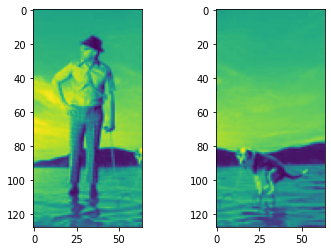

In [146]:
unk1 = io.imread(path_to_project + 'images/unknown1.png')
unk2 = io.imread(path_to_project + 'images/unknown2.png')

fig, ax = plt.subplots(1,2)

ax[0].imshow(unk1)
ax[1].imshow(unk2)


In [168]:
for unk in zip([unk1, unk2], ["unknown1 (Person)", "unknown2 (Dog)"]):

    gradient_magnitude_unk, theta_unk = get_thetas_and_gradients(unk[0])


    cell_histograms_unk = compute_cell_histograms(theta_unk, gradient_magnitude_unk)
    block_descriptors_unk = compute_block_descriptors(cell_histograms_unk, normalize = True)
    descriptor_unk = compute_descriptor(block_descriptors_unk)

    print(f"\nDistances to {unk[1]}:")

    for pers in zip([pers1, pers2, pers3],["pers1", "pers2", "pers3"]):


            gradient_magnitude_pers, theta_pers = get_thetas_and_gradients(pers[0])
            cell_histograms_pers = compute_cell_histograms(theta_pers, gradient_magnitude_pers)
            block_descriptors_pers = compute_block_descriptors(cell_histograms_pers, normalize = True)
            descriptor_pers = compute_descriptor(block_descriptors_pers)

            print(f"{pers[1]}:", np.linalg.norm(descriptor_pers - descriptor_unk))



Distances to unknown1 (Person):
pers1: 1.0706512016373695
pers2: 0.9937120735011225
pers3: 0.9960593652575688

Distances to unknown2 (Dog):
pers1: 1.1016207101764197
pers2: 1.052130567482767
pers3: 1.1552345518123652


### Congratz, you made it through Assignment 2! You can now try to solve this optional exercise.

This exercise is not graded, but might be a good preparation for the exam.

Please go to the following link: https://forms.gle/KEDpniwr4UGCcen96.

In the form, you will find the optional task (and the corresponding consent form in case you agree with us processing your data). The task is formulated in German, and we would prefer German as the language for your answer. However, if you don’t feel comfortable with that, please feel free to solve it in English.